In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning) 
warnings.simplefilter("ignore", UserWarning)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

njobs = -1

In [2]:
train=pd.read_csv('../../1. Task and Data/train.csv',sep='|')
test=pd.read_csv('../../1. Task and Data/test.csv',sep='|')

In [3]:
print(train.fraud.value_counts())
print(train.fraud.value_counts() / len(train))

0    1775
1     104
Name: fraud, dtype: int64
0    0.944651
1    0.055349
Name: fraud, dtype: float64


# Feature Engineering

In [4]:
# for training set

train['scannedLineItems'] = train['scannedLineItemsPerSecond'] * train['totalScanTimeInSeconds']
train['pricePerScannedLineItem'] = train['grandTotal'] / train['scannedLineItems']
train['scansWithoutRegistrationPerScannedLineItem'] = train['scansWithoutRegistration'] / train['scannedLineItems']
train['quantityModificationsPerScannedLineItem'] = train['quantityModifications'] / train['scannedLineItems']
train['lineItemVoidsPerSecond'] = train['lineItemVoids'] / train['totalScanTimeInSeconds']
train['scansWithoutRegistrationPerSecond'] = train['scansWithoutRegistration'] / train['totalScanTimeInSeconds']
train['quantityModificationsPerSecond'] = train['quantityModifications'] / train['totalScanTimeInSeconds']
train['secondsPerEuro'] = train['totalScanTimeInSeconds'] / train['grandTotal']
train['lineItemVoidsPerEuro'] = train['lineItemVoids'] / train['grandTotal']
train['scansWithoutRegistrationPerEuro'] = train['scansWithoutRegistration'] / train['grandTotal']
train['quantityModificationsPerEuro'] = train['quantityModifications'] / train['grandTotal']

test['scannedLineItems'] = test['scannedLineItemsPerSecond'] * test['totalScanTimeInSeconds']
test['pricePerScannedLineItem'] = test['grandTotal'] / test['scannedLineItems']
test['scansWithoutRegistrationPerScannedLineItem'] = test['scansWithoutRegistration'] / test['scannedLineItems']
test['quantityModificationsPerScannedLineItem'] = test['quantityModifications'] / test['scannedLineItems']
test['lineItemVoidsPerSecond'] = test['lineItemVoids'] / test['totalScanTimeInSeconds']
test['scansWithoutRegistrationPerSecond'] = test['scansWithoutRegistration'] / test['totalScanTimeInSeconds']
test['quantityModificationsPerSecond'] = test['quantityModifications'] / test['totalScanTimeInSeconds']
test['secondsPerEuro'] = test['totalScanTimeInSeconds'] / test['grandTotal']
test['lineItemVoidsPerEuro'] = test['lineItemVoids'] / test['grandTotal']
test['scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / test['grandTotal']
test['quantityModificationsPerEuro'] = test['quantityModifications'] / test['grandTotal']

In [5]:
test.loc[test['grandTotal'] == 0.00, 'secondsPerEuro'] = test['totalScanTimeInSeconds'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'lineItemVoidsPerEuro'] = test['lineItemVoids'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'scansWithoutRegistrationPerEuro'] = test['scansWithoutRegistration'] / 0.01
test.loc[test['grandTotal'] == 0.00, 'quantityModificationsPerEuro'] = test['quantityModifications'] / 0.01

Add tSNE/PCA Features

In [7]:
train_test_combined = pd.concat([train, test], ignore_index=True)

In [8]:
X_train_test_combined = train_test_combined.drop('fraud',axis=1)
Y_train_test_combined = train_test_combined['fraud']
print(X_train_test_combined.shape, Y_train_test_combined.shape)

(500000, 20) (500000,)


In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer 

feature_scaler = MinMaxScaler()
X_train_test_combined = pd.DataFrame(feature_scaler.fit_transform(X_train_test_combined.values), columns=X_train_test_combined.columns, index=X_train_test_combined.index)


In [10]:
from sklearn.decomposition import PCA

X_train_test_combined_PCA = X_train_test_combined.copy()

pca = PCA(n_components=7)
pca_result = pca.fit_transform(X_train_test_combined_PCA)

X_train_test_combined_PCA['pca-one'] = pca_result[:,0]
X_train_test_combined_PCA['pca-two'] = pca_result[:,1] 
X_train_test_combined_PCA['pca-three'] = pca_result[:,2]

X_train_test_combined_PCA['pca-one'] = pca_result[:,0]
X_train_test_combined_PCA['pca-two'] = pca_result[:,1] 
X_train_test_combined_PCA['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for 7 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Explained variation per principal component: [0.16124041 0.1559011  0.14737624 0.13509126 0.13197732 0.11312753
 0.11161208]
Cumulative explained variation for 7 principal components: 0.9563259397521092


In [11]:
train['pca_axis_1'] = X_train_test_combined_PCA['pca-one'].head(len(train))
train['pca_axis_2'] = X_train_test_combined_PCA['pca-two'].head(len(train))

In [12]:
X_train_test_combined_tSNE = X_train_test_combined.copy()
tsne_results = pd.read_pickle("tsneResult.pkl").values

In [13]:
X_train_test_combined_tSNE['tsne-one'] = tsne_results[:,0]
X_train_test_combined_tSNE['tsne-two'] = tsne_results[:,1]

In [14]:
X_train_test_combined_tSNE.head()

,grandTotal,lineItemVoids,lineItemVoidsPerEuro,lineItemVoidsPerPosition,lineItemVoidsPerSecond,pricePerScannedLineItem,quantityModifications,quantityModificationsPerEuro,quantityModificationsPerScannedLineItem,quantityModificationsPerSecond,scannedLineItems,scannedLineItemsPerSecond,scansWithoutRegistration,scansWithoutRegistrationPerEuro,scansWithoutRegistrationPerScannedLineItem,scansWithoutRegistrationPerSecond,secondsPerEuro,totalScanTimeInSeconds,trustLevel,valuePerSecond,tsne-one,tsne-two
0,0.547055,0.636364,0.000116,0.021944,0.000604,0.018864,0.6,0.000110,0.020690,0.000569,0.965517,0.000899,0.0,0.000000,0.000000,0.000000,0.000105,0.575410,0.8,0.000520,0.371124,2.065992
1,0.273627,0.454545,0.000166,0.032468,0.004209,0.019545,0.8,0.000292,0.057143,0.007407,0.448276,0.004303,0.2,0.000073,0.014286,0.001852,0.000022,0.058470,0.4,0.002541,1.413292,-0.542113
2,0.621662,0.272727,0.000044,0.020979,0.000180,0.047820,1.0,0.000161,0.076923,0.000660,0.413793,0.000268,1.0,0.000161,0.076923,0.000660,0.000133,0.827869,0.4,0.000411,2.043197,-0.529174
3,0.923192,0.727273,0.000079,0.025078,0.000406,0.031834,0.8,0.000087,0.027586,0.000447,0.965517,0.000522,0.4,0.000043,0.013793,0.000223,0.000106,0.978142,1.0,0.000517,1.375445,2.444786
4,0.815382,0.272727,0.000033,0.010101,0.000634,0.030199,0.4,0.000049,0.014815,0.000930,0.896552,0.002075,0.7,0.000086,0.025926,0.001628,0.000029,0.234426,0.8,0.001902,-0.579406,1.961413


In [15]:
train['tsne_axis_1'] = X_train_test_combined_tSNE['tsne-one'].head(len(train))
train['tsne_axis_2'] = X_train_test_combined_tSNE['tsne-two'].head(len(train))

In [16]:
train.head(10)

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,fraud,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro,pca_axis_1,pca_axis_2,tsne_axis_1,tsne_axis_2
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,0,29.0,1.886207,0.000000,0.103448,0.006641,0.000000,0.002846,19.268739,0.127971,0.000000,0.054845,-0.106133,0.278145,0.371124,2.065992
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,0,14.0,1.954286,0.142857,0.285714,0.046296,0.018519,0.037037,3.947368,0.182749,0.073099,0.146199,0.243599,-0.108150,1.413292,-0.542113
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,0,13.0,4.781538,0.769231,0.384615,0.001979,0.006596,0.003298,24.388674,0.048263,0.160875,0.080438,0.502515,-0.100077,2.043197,-0.529174
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,0,29.0,3.183103,0.137931,0.137931,0.004467,0.002233,0.002233,19.402015,0.086665,0.043332,0.043332,0.122039,0.480733,1.375445,2.444786
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,0,27.0,3.019630,0.259259,0.074074,0.006977,0.016279,0.004651,5.274132,0.036796,0.085858,0.024531,-0.226498,0.289921,-0.579406,1.961413
5,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,1,26.0,0.426538,0.192308,0.076923,0.014286,0.006494,0.002597,69.431921,0.991885,0.450857,0.180343,-0.212661,-0.509492,-0.656204,-2.447449
6,3,294,55.63,2,7,1,0.037415,0.189218,0.181818,0,11.0,5.057273,0.636364,0.090909,0.006803,0.023810,0.003401,5.284918,0.035952,0.125831,0.017976,-0.241190,-0.091522,-1.573847,-0.438576
7,2,1545,22.80,0,8,4,0.006472,0.014757,0.000000,0,10.0,2.280000,0.800000,0.400000,0.000000,0.005178,0.002589,67.763158,0.000000,0.350877,0.175439,0.310786,-0.297834,1.287310,-1.474801
8,6,962,65.44,7,0,2,0.028067,0.068025,0.259259,0,27.0,2.423704,0.000000,0.074074,0.007277,0.000000,0.002079,14.700489,0.106968,0.000000,0.030562,-0.263363,0.482789,-0.620175,2.505669
9,2,725,41.08,10,2,4,0.037241,0.056662,0.370370,0,27.0,1.521481,0.074074,0.148148,0.013793,0.002759,0.005517,17.648491,0.243427,0.048685,0.097371,0.124496,-0.319390,1.443362,-1.942744


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

def my_custom_loss_func(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    score = ((-25)*fp + (-5)*fn + 5*tp) / len(y_true)
    return (score)

my_custom_score = make_scorer(my_custom_loss_func, greater_is_better=True)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

skf = StratifiedKFold(n_splits=10)
loo = LeaveOneOut()

In [18]:
def get_monetary_value(cm):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(str(score) + " for " + str(sum(sum(cm))) + " instances in the test set")
        print(str(score/sum(sum(cm))) + " per instance in the test set")
        return score

#### train/test split

In [19]:
#import scipy.sparse
from sklearn.model_selection import train_test_split

X = train.drop('fraud', axis=1)
y = train.fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [338]:
X.head()

,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro,pca_axis_1,pca_axis_2,tsne_axis_1,tsne_axis_2
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,29.0,1.886207,0.000000,0.103448,0.006641,0.000000,0.002846,19.268739,0.127971,0.000000,0.054845,-0.106133,0.278145,0.371124,2.065992
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,14.0,1.954286,0.142857,0.285714,0.046296,0.018519,0.037037,3.947368,0.182749,0.073099,0.146199,0.243599,-0.108150,1.413292,-0.542113
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,13.0,4.781538,0.769231,0.384615,0.001979,0.006596,0.003298,24.388674,0.048263,0.160875,0.080438,0.502515,-0.100077,2.043197,-0.529174
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,29.0,3.183103,0.137931,0.137931,0.004467,0.002233,0.002233,19.402015,0.086665,0.043332,0.043332,0.122039,0.480733,1.375445,2.444786
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,27.0,3.019630,0.259259,0.074074,0.006977,0.016279,0.004651,5.274132,0.036796,0.085858,0.024531,-0.226498,0.289921,-0.579406,1.961413


# Ensemble Methods

#### Base Estimators

In [313]:
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

log_reg = LogisticRegression(C = 1.2000000000000002,
                           fit_intercept = True,
                           solver = 'newton-cg')
extra_trees = ExtraTreesClassifier(criterion = 'gini',
                                  n_estimators = 69)
random_forest = RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators=40)
lda = LinearDiscriminantAnalysis(n_components = 1, solver = 'lsqr')
svc = SVC(C=4.0, class_weight='balanced', coef0=0.0,
        kernel='linear',
        random_state=42)
k_neighbors = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', p = 2)
gaussian_nb = GaussianNB(priors = None, var_smoothing = 1e-09)




#Boosting:
xg_boost = XGBClassifier(objective="binary:logistic",
                    random_state=42,
                    max_depth=5,
                    min_child_weight= 1,
                    gamma = 0,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    scale_pos_weight = 1,
                    n_jobs = -1
                   )
ada_boost = AdaBoostClassifier(n_estimators=200,
                         learning_rate=1)




clfs_labeled=[('lr', log_reg), ('et', extra_trees), ('lda', lda), ('svc', svc), ('kn', k_neighbors),('nb', gaussian_nb)]
clfs_unlabeled=[log_reg, extra_trees, lda, svc, k_neighbors, gaussian_nb]
clf_labels=labels = ['lr', 'et', 'lda', 'svc', 'kn', 'nb']

### VotingClassifier
https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

In [314]:
from sklearn.ensemble import VotingClassifier

votingClf = VotingClassifier(clfs_labeled, voting='soft')

model = ensemble.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
get_monetary_value(cm)

True negative:  439
False positive:  3
False negative:  6
True positive:  22
5 for 470 instances in the test set
0.010638297872340425 per instance in the test set


5

### vecstack
https://github.com/vecxoz/vecstack

Without SKLearn Wrapper:

In [315]:
from vecstack import stacking
from sklearn.metrics import accuracy_score

S_train, S_test = stacking(clfs_unlabeled,                   
                           X_train, y_train, X_test,   
                           regression=False, 
                           mode='oof_pred_bag', 
                           needs_proba=False,
                           save_dir=None, 
                           metric=accuracy_score, 
                           n_folds=4, 
                           stratified=True,
                           shuffle=True,  
                           random_state=0,    
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [LogisticRegression]
    fold  0:  [0.98016997]
    fold  1:  [0.99147727]
    fold  2:  [0.99147727]
    fold  3:  [0.99147727]
    ----
    MEAN:     [0.98865045] + [0.00489620]
    FULL:     [0.98864443]

model  1:     [ExtraTreesClassifier]
    fold  0:  [0.96600567]
    fold  1:  [0.98295455]
    fold  2:  [0.98863636]
    fold  3:  [0.97443182]
    ----
    MEAN:     [0.97800710] + [0.00857723]
    FULL:     [0.97799858]

model  2:     [LinearDiscriminantAnalysis]
    fold  0:  [0.96033994]
    fold  1:  [0.97443182]
    fold  2:  [0.96306818]
    fold  3:  [0.97443182]
    ----
    MEAN:     [0.96806794] + [0.00643656]
    FULL:     [0.96806246]

model  3:     [SVC]
    fold  0:  [0.98866856]
    fold  1:  [0.98863636]
    fold  2:  [0.99715909]
    fold  3:  [0.98579545]
    ----
    MEAN:     [0.99006487] + [0.00425870]
    FULL:     [0.

In [316]:
#TODO: Try out different classifiers:
model = xg_boost.fit(S_train, y_train)
y_pred = model.predict(S_test)

cm = confusion_matrix(y_test, y_pred)
get_monetary_value(cm)

True negative:  439
False positive:  3
False negative:  5
True positive:  23
15 for 470 instances in the test set
0.031914893617021274 per instance in the test set


15

With SKLearn Wrapper:

In [331]:
from vecstack import StackingTransformer

stack = StackingTransformer(clfs_labeled, regression=False, verbose=2)

stack = stack.fit(X,y)
S_train2 = stack.transform(X)

#stack = stack.fit(X_train, y_train)

#S_train2 = stack.transform(X_train)
#S_test2 = stack.transform(X_test)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
variant:      [A]
n_estimators: [6]

estimator  0: [lr: LogisticRegression]
    fold  0:  [0.98085106]
    fold  1:  [0.98936170]
    fold  2:  [0.99787234]
    fold  3:  [0.98081023]
    ----
    MEAN:     [0.98722384] + [0.00706590]

estimator  1: [et: ExtraTreesClassifier]
    fold  0:  [0.98510638]
    fold  1:  [0.99148936]
    fold  2:  [0.97872340]
    fold  3:  [0.96375267]
    ----
    MEAN:     [0.97976795] + [0.01028920]

estimator  2: [lda: LinearDiscriminantAnalysis]
    fold  0:  [0.96595745]
    fold  1:  [0.98085106]
    fold  2:  [0.98510638]
    fold  3:  [0.95309168]
    ----
    MEAN:     [0.97125164] + [0.01266802]

estimator  3: [svc: SVC]
    fold  0:  [0.98085106]
    fold  1:  [0.99148936]
    fold  2:  [0.98936170]
    fold  3:  [0.98933902]
    ----
    MEAN:     [0.98776029] + [0.00408351]

estimator  4: [kn: KNeighborsClassifier]
    fold  0:  [0.94468085]
    fold  1:  [0.95744

In [333]:
df_S_train2 = pd.DataFrame(S_train2)
df_S_train2.columns = clf_labels

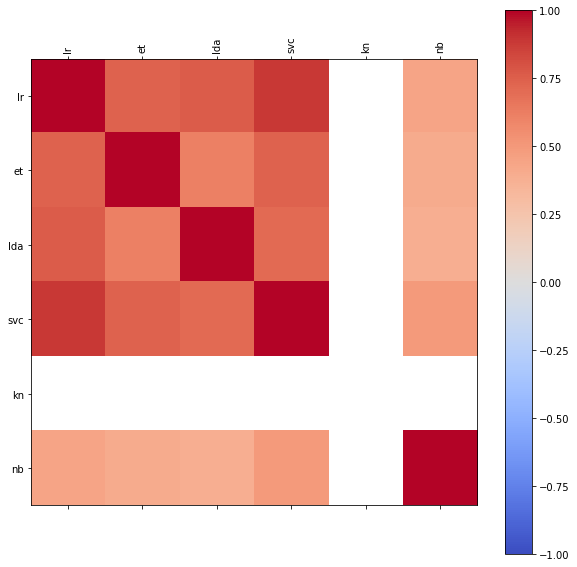

In [334]:
import matplotlib.pyplot as plt

corr = df_S_train2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_S_train2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_S_train2.columns)
ax.set_yticklabels(df_S_train2.columns)
plt.show()

In [335]:
df_S_train2

,lr,et,lda,svc,kn,nb
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,1,1,0,1,0,1
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,1


In [340]:
print("STrain2 ", df_S_train2.shape)
print("XTrain ", X.shape)

S_train_combined = pd.concat([X, df_S_train2], axis =1)
S_train_combined

#model = xg_boost.fit(S_train_combined, y_train)
#y_pred = model.predict(S_test2)

#cm = confusion_matrix(y_test, y_pred)
#get_monetary_value(cm)

STrain2  (1879, 6)
XTrain  (1879, 24)


,trustLevel,totalScanTimeInSeconds,grandTotal,lineItemVoids,scansWithoutRegistration,quantityModifications,scannedLineItemsPerSecond,valuePerSecond,lineItemVoidsPerPosition,scannedLineItems,pricePerScannedLineItem,scansWithoutRegistrationPerScannedLineItem,quantityModificationsPerScannedLineItem,lineItemVoidsPerSecond,scansWithoutRegistrationPerSecond,quantityModificationsPerSecond,secondsPerEuro,lineItemVoidsPerEuro,scansWithoutRegistrationPerEuro,quantityModificationsPerEuro,pca_axis_1,pca_axis_2,tsne_axis_1,tsne_axis_2,lr,et,lda,svc,kn,nb
0,5,1054,54.70,7,0,3,0.027514,0.051898,0.241379,29.0,1.886207,0.000000,0.103448,0.006641,0.000000,0.002846,19.268739,0.127971,0.000000,0.054845,-0.106133,0.278145,0.371124,2.065992,0,0,0,0,0,0
1,3,108,27.36,5,2,4,0.129630,0.253333,0.357143,14.0,1.954286,0.142857,0.285714,0.046296,0.018519,0.037037,3.947368,0.182749,0.073099,0.146199,0.243599,-0.108150,1.413292,-0.542113,0,0,0,0,0,0
2,3,1516,62.16,3,10,5,0.008575,0.041003,0.230769,13.0,4.781538,0.769231,0.384615,0.001979,0.006596,0.003298,24.388674,0.048263,0.160875,0.080438,0.502515,-0.100077,2.043197,-0.529174,0,0,0,0,0,0
3,6,1791,92.31,8,4,4,0.016192,0.051541,0.275862,29.0,3.183103,0.137931,0.137931,0.004467,0.002233,0.002233,19.402015,0.086665,0.043332,0.043332,0.122039,0.480733,1.375445,2.444786,0,0,0,0,0,0
4,5,430,81.53,3,7,2,0.062791,0.189605,0.111111,27.0,3.019630,0.259259,0.074074,0.006977,0.016279,0.004651,5.274132,0.036796,0.085858,0.024531,-0.226498,0.289921,-0.579406,1.961413,0,0,0,0,0,0
5,1,770,11.09,11,5,2,0.033766,0.014403,0.423077,26.0,0.426538,0.192308,0.076923,0.014286,0.006494,0.002597,69.431921,0.991885,0.450857,0.180343,-0.212661,-0.509492,-0.656204,-2.447449,1,1,0,1,0,1
6,3,294,55.63,2,7,1,0.037415,0.189218,0.181818,11.0,5.057273,0.636364,0.090909,0.006803,0.023810,0.003401,5.284918,0.035952,0.125831,0.017976,-0.241190,-0.091522,-1.573847,-0.438576,0,0,0,0,0,0
7,2,1545,22.80,0,8,4,0.006472,0.014757,0.000000,10.0,2.280000,0.800000,0.400000,0.000000,0.005178,0.002589,67.763158,0.000000,0.350877,0.175439,0.310786,-0.297834,1.287310,-1.474801,0,0,0,0,0,0
8,6,962,65.44,7,0,2,0.028067,0.068025,0.259259,27.0,2.423704,0.000000,0.074074,0.007277,0.000000,0.002079,14.700489,0.106968,0.000000,0.030562,-0.263363,0.482789,-0.620175,2.505669,0,0,0,0,0,0
9,2,725,41.08,10,2,4,0.037241,0.056662,0.370370,27.0,1.521481,0.074074,0.148148,0.013793,0.002759,0.005517,17.648491,0.243427,0.048685,0.097371,0.124496,-0.319390,1.443362,-1.942744,0,0,0,0,0,1


In [341]:
print(S_train_combined.shape)

(1879, 30)


## Boosting
https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de

In [253]:
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import EnsembleVoteClassifier


eclf = EnsembleVoteClassifier(clfs=clfs_unlabeled, voting='hard')

for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))#Let’s perform the same of voting on our boosting models
    
model = eclf.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
get_monetary_value(cm)

Mean: 0.993, std: (+/-) 0.004 [Ada Boost]
Mean: 0.985, std: (+/-) 0.008 [Extra Trees]
Mean: 0.986, std: (+/-) 0.009 [Logistic Regression]
Mean: 0.988, std: (+/-) 0.008 [XGBoost]
True negative:  442
False positive:  0
False negative:  6
True positive:  22
80 for 470 instances in the test set
0.1702127659574468 per instance in the test set


80

## Stacking
https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de

In [255]:
import itertools
from itertools import combinations
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

def zip_stacked_classifiers(*args):
    to_zip = []
    for arg in args:
        combined_items = sum([map(list, combinations(arg, i)) for i in range(len(arg) + 1)], [])
        combined_items = filter(lambda x: len(x) > 0, combined_items)
        to_zip.append(combined_items)
    
    return zip(to_zip[0], to_zip[1])

stacked_clf_list = zip_stacked_classifiers(clfs_unlabeled, clf_labels)

best_combination = [0.00, ""]

for clf in stacked_clf_list:
    
    ensemble = SuperLearner(scorer = accuracy_score, 
                            random_state = 42, 
                            folds = 10)
    ensemble.add(clf[0])
    ensemble.add_meta(lr)
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    
    if accuracy > best_combination[0]:
        best_combination[0] = accuracy
        best_combination[1] = clf[1]
    
    print("Accuracy score: {:.3f} {}").format(accuracy, clf[1])

print("\nBest stacking model is {} with accuracy of: {:.3f}").format(best_combination[1], best_combination[0])

TypeError: can only concatenate list (not "map") to list

#### Decision Trees

In [190]:
from sklearn.tree import DecisionTreeClassifier

t1 = DecisionTreeClassifier(max_depth=1, random_state=42)
t1.fit(X_train, y_train)
print(t1.predict_proba(X_test))
p = t1.predict_proba(X_test)[:, 1]
print(p)

[[0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]
 [0.98472116 0.01527884]


### VotingClassifier https://www.kaggle.com/samratp/beginner-tutorial-using-votingclassifier-82-27

In [48]:
from sklearn import ensemble
rf_est = ensemble.RandomForestClassifier(n_estimators = 750,
                                         criterion = 'gini',
                                         max_features = 'sqrt',
                                         max_depth = 3,
                                         min_samples_split = 4, 
                                         min_samples_leaf = 2,
                                         n_jobs = 50,
                                         random_state = 42,
                                         verbose = 1)
gbm_est = ensemble.GradientBoostingClassifier(n_estimators = 900,
                                              learning_rate = 0.0008, 
                                              loss = 'exponential', 
                                              min_samples_split = 3, 
                                              min_samples_leaf = 2, 
                                              max_features ='sqrt', 
                                              max_depth = 3,  
                                              random_state = 42, 
                                              verbose = 1)
et_est = ensemble.ExtraTreesClassifier(n_estimators = 750, 
                                       max_features = 'sqrt', 
                                       max_depth = 35,  
                                       n_jobs = 50, 
                                       criterion = 'entropy', 
                                       random_state = 42, 
                                       verbose = 1)

voting_est = ensemble.VotingClassifier(estimators = [('rf', rf_est),('gbm', gbm_est),('et', et_est)],
                                       voting = 'soft', 
                                       weights = [3,5,2],
                                       n_jobs = 50)
voting_est.fit(X_train, y_train)
print("VotingClassifier Score: " + str(voting_est.score(X_train, y_train)))
print("VotingClassifier Estimators: " + str(voting_est.estimators_))

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.1s finished
[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.1s finished


VotingClassifier Score: 0.9460610361958836
VotingClassifier Estimators: [RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=750, n_jobs=50,
            oob_score=False, random_state=42, verbose=1, warm_start=False), GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0008, loss='exponential', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=3,
              min_weight_fraction_leaf=0.0, n_estimators=900,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
            

In [50]:
y_pred = voting_est.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
get_monetary_value(cm)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.0s finished


True negative:  442
False positive:  0
False negative:  28
True positive:  0
-140 for 470 instances in the test set
-0.2978723404255319 per instance in the test set


[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:    0.0s
[Parallel(n_jobs=50)]: Done 750 out of 750 | elapsed:    0.0s finished


-140

#### MLEns
https://www.kaggle.com/flennerhag/ml-ensemble-scikit-learn-style-ensemble-learning

In [256]:
from mlens.ensemble import SuperLearner
from sklearn.metrics import f1_score

seed = 42
np.random.seed(seed)

def f1(y, p): return f1_score(y, p, average='micro')

ensemble = Superlearner(scorer=f1, random_state=seed)
ensemble.add(log_reg, ada_boost)

ModuleNotFoundError: No module named 'mlens'

# Model tuning

In [149]:
from sklearn.pipeline import Pipeline

mixed_pipe = Pipeline([
    ("voting", VotingClassifier(estimators, voting="soft"))
])

#### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]


param_grid = dict(
    voting__weights=combinations_on_off(len(estimators)))

model_tuning_factory = [
    GridSearchCV(mixed_pipe, 
                    param_grid=param_grid,
                    cv=skf,
                    n_jobs=-1, 
                    verbose=10, 
                    scoring=my_custom_score)
                ]

#### Random Search

In [172]:
from sklearn.model_selection import RandomizedSearchCV

iterations = 4

model_tuning_factory_randomized = [
    RandomizedSearchCV(mixed_pipe, 
                    param_grid,
                    cv=skf,
                    n_jobs=-1, 
                    verbose=10,
                    n_iter=iterations,
                    scoring=my_custom_score)
                ]

In [173]:
Y = train['fraud']
X = train.drop('fraud',axis=1)

In [174]:
import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE


import time
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

result_table = pd.DataFrame(columns=["Model", "Data Preparation", "Feature Count", "Feature Selection Technique", "Features", "Optimal Parameters", "Monetary Value Per Instance - Mean", "Monetary Value Per Instance - Standard Deviation", "Raw Model"])
X_scaled = X   
data_preparation = "No Scaling"


######### TODO: Feature Importance xgboost: get_fscore()
for model in model_tuning_factory_randomized:   # replace with model_tuning_factory_randomized for faster results


    for feature_count in range(1,len(list(X))+1):
        
        model.seed = 42
        start_time = time.time()              


        # Solution with SelectKBest
        best_features = SelectKBest(f_classif, k=feature_count).fit(X_scaled,Y)
        best_feature_list = X.columns[best_features.get_support()]
        X_selected_features = X[best_feature_list]

        model.fit(X_selected_features,Y)  
        model_name = model.best_estimator_.__class__.__name__
        score_mean = model.cv_results_['mean_test_score'][model.best_index_]
        score_std = model.cv_results_['std_test_score'][model.best_index_]

        result_table = result_table.append({
         "Model": model_name, 
         "Data Preparation": data_preparation,   
         "Feature Count": feature_count,
         "Feature Selection Technique": "SelectKBest",   
         "Features": best_feature_list.values, 
         "Optimal Parameters": model.best_params_,
         "Monetary Value Per Instance - Mean":  score_mean,
         "Monetary Value Per Instance - Standard Deviation": score_std,   
         "Raw Model": model.best_estimator_
          }, ignore_index=True)


        # Solution with Recursive Feature Elimination -> only works for some models

        if (model.estimator.__class__.__name__ == 'LogisticRegression'
         or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
         or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
         or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
         or model.estimator.__class__.__name__ == 'RandomForestClassifier'
         or model.estimator.__class__.__name__ == 'BernoulliNB'
         or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
         or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
         or model.estimator.__class__.__name__ == 'Perceptron'
         or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'
         or model.estimator.__class__.__name__ == 'XGBClassifier'):

           # Traditional RFE
            rfe = RFE(model.estimator, n_features_to_select = feature_count)
            rfe = rfe.fit(X,Y)
            best_feature_list = np.array(list(X))[np.array(rfe.support_)]
            X_selected_features = X[best_feature_list]

            model.fit(X_selected_features,Y)  
            model_name = model.best_estimator_.__class__.__name__
            score_mean = model.cv_results_['mean_test_score'][model.best_index_]
            score_std = model.cv_results_['std_test_score'][model.best_index_]


            result_table = result_table.append({
             "Model": model_name, 
             "Data Preparation": data_preparation,
             "Feature Count": feature_count,
             "Feature Selection Technique": "RFE",
             "Features": best_feature_list,
             "Optimal Parameters": model.best_params_,
             "Monetary Value Per Instance - Mean":  score_mean,
             "Monetary Value Per Instance - Standard Deviation": score_std,  
             "Raw Model": model.best_estimator_
              }, ignore_index=True)

        end_time = time.time()

        print("Finished " + model.best_estimator_.__class__.__name__ + " with " + data_preparation + " and " + str(feature_count) + " features after " + str(round(end_time - start_time, 2)) + " seconds")



    if (model.estimator.__class__.__name__ == 'LogisticRegression'
     or model.estimator.__class__.__name__ == 'DecisionTreeClassifier'
     or model.estimator.__class__.__name__ == 'ExtraTreeClassifier'
     or model.estimator.__class__.__name__ == 'ExtraTreesClassifier'
     or model.estimator.__class__.__name__ == 'RandomForestClassifier'
     or model.estimator.__class__.__name__ == 'BernoulliNB'
     or model.estimator.__class__.__name__ == 'AdaBoostClassifier'
     or model.estimator.__class__.__name__ == 'GradientBoostingClassifier'
     or model.estimator.__class__.__name__ == 'Perceptron'
     or model.estimator.__class__.__name__ == 'LinearDiscriminantAnalysis'
     or model.estimator.__class__.__name__ == 'XGBClassifier'):

        # RFE with Cross Validation -> determines the optimum feature count automatically
        rfecv = RFECV(model.estimator, cv = skf, scoring = my_custom_score)
        rfecv = rfe.fit(X,Y)
        best_feature_list = np.array(list(X))[np.array(rfecv.support_)]
        X_selected_features = X[best_feature_list]

        model.fit(X_selected_features,Y)  
        model_name = model.best_estimator_.__class__.__name__
        score_mean = model.cv_results_['mean_test_score'][model.best_index_]
        score_std = model.cv_results_['std_test_score'][model.best_index_]


        result_table = result_table.append({
         "Model": model_name,  
         "Data Preparation": data_preparation,
         "Feature Count": len(best_feature_list),
         "Feature Selection Technique": "RFECV",
         "Features": best_feature_list,
         "Optimal Parameters": model.best_params_,
         "Monetary Value Per Instance - Mean":  score_mean,
         "Monetary Value Per Instance - Standard Deviation": score_std,    
         "Raw Model": model.best_estimator_
          }, ignore_index=True)


result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   13.7s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   14.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   14.5s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 1 features after 15.28 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    3.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    3.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.4s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 2 features after 4.91 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    3.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    4.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    4.9s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 3 features after 5.49 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    5.3s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    5.6s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    6.0s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 4 features after 6.64 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    7.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    8.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.9s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 5 features after 9.83 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    7.1s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.1s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 6 features after 9.15 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    6.7s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    7.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.4s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 7 features after 9.34 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    6.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    7.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    7.8s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 8 features after 8.71 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    6.5s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.1s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 9 features after 9.07 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    8.1s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.0s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 10 features after 10.06 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    8.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    8.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.3s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 11 features after 10.39 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    7.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    7.9s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.8s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 12 features after 9.76 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    6.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    7.9s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    8.8s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 13 features after 9.9 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    8.5s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    8.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.7s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 14 features after 10.74 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    7.8s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    8.8s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.8s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 15 features after 10.9 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    8.7s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    8.9s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.1s finished


Finished Pipeline with No Scaling and 16 features after 11.27 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    8.3s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    8.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    9.6s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 17 features after 10.72 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    8.1s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    9.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.1s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 18 features after 11.24 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    9.0s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    9.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.2s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 19 features after 11.41 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    7.6s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    9.3s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.2s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 20 features after 11.4 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    9.3s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:    9.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   10.8s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 21 features after 11.94 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:   10.1s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   11.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   12.7s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 22 features after 13.95 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    9.5s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   10.8s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.9s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 23 features after 13.23 seconds
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  30 out of  40 | elapsed:    9.8s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  35 out of  40 | elapsed:   11.2s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.7s finished
C:\Users\Lukas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Finished Pipeline with No Scaling and 24 features after 12.95 seconds


,Model,Data Preparation,Feature Count,Feature Selection Technique,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model
11,Pipeline,No Scaling,12,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 1]}",0.156998,0.085381,"Pipeline(memory=None,\n steps=[('voting', ..."
17,Pipeline,No Scaling,18,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 1]}",0.154337,0.093699,"Pipeline(memory=None,\n steps=[('voting', ..."
16,Pipeline,No Scaling,17,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 0]}",0.154337,0.091360,"Pipeline(memory=None,\n steps=[('voting', ..."
21,Pipeline,No Scaling,22,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [1, 1, 1]}",0.151676,0.110174,"Pipeline(memory=None,\n steps=[('voting', ..."
12,Pipeline,No Scaling,13,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 1]}",0.149015,0.089962,"Pipeline(memory=None,\n steps=[('voting', ..."
15,Pipeline,No Scaling,16,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 0]}",0.149015,0.099805,"Pipeline(memory=None,\n steps=[('voting', ..."
14,Pipeline,No Scaling,15,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 0]}",0.149015,0.099805,"Pipeline(memory=None,\n steps=[('voting', ..."
13,Pipeline,No Scaling,14,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 1]}",0.135710,0.081051,"Pipeline(memory=None,\n steps=[('voting', ..."
10,Pipeline,No Scaling,11,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scansWith...","{'voting__weights': [1, 1, 1]}",0.127728,0.106165,"Pipeline(memory=None,\n steps=[('voting', ..."
23,Pipeline,No Scaling,24,SelectKBest,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'voting__weights': [1, 1, 1]}",0.125067,0.098008,"Pipeline(memory=None,\n steps=[('voting', ..."


In [175]:
result_table.head()

,Model,Data Preparation,Feature Count,Feature Selection Technique,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model
0,Pipeline,No Scaling,1,SelectKBest,[tsne_axis_2],"{'voting__weights': [0, 1, 0]}",-0.388505,0.220408,"Pipeline(memory=None,\n steps=[('voting', ..."
1,Pipeline,No Scaling,2,SelectKBest,"[pca_axis_2, tsne_axis_2]","{'voting__weights': [0, 1, 1]}",-0.489622,0.240962,"Pipeline(memory=None,\n steps=[('voting', ..."
2,Pipeline,No Scaling,3,SelectKBest,"[trustLevel, pca_axis_2, tsne_axis_2]","{'voting__weights': [0, 1, 0]}",-0.388505,0.220408,"Pipeline(memory=None,\n steps=[('voting', ..."
3,Pipeline,No Scaling,4,SelectKBest,"[trustLevel, scannedLineItems, pca_axis_2, tsn...","{'voting__weights': [0, 1, 1]}",-0.154337,0.202250,"Pipeline(memory=None,\n steps=[('voting', ..."
4,Pipeline,No Scaling,5,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scannedLi...","{'voting__weights': [0, 1, 1]}",-0.042576,0.222422,"Pipeline(memory=None,\n steps=[('voting', ..."


In [176]:
result_table.sort_values(by = "Monetary Value Per Instance - Mean", ascending = False)

,Model,Data Preparation,Feature Count,Feature Selection Technique,Features,Optimal Parameters,Monetary Value Per Instance - Mean,Monetary Value Per Instance - Standard Deviation,Raw Model
11,Pipeline,No Scaling,12,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 1]}",0.156998,0.085381,"Pipeline(memory=None,\n steps=[('voting', ..."
17,Pipeline,No Scaling,18,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 1]}",0.154337,0.093699,"Pipeline(memory=None,\n steps=[('voting', ..."
16,Pipeline,No Scaling,17,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 0]}",0.154337,0.091360,"Pipeline(memory=None,\n steps=[('voting', ..."
21,Pipeline,No Scaling,22,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [1, 1, 1]}",0.151676,0.110174,"Pipeline(memory=None,\n steps=[('voting', ..."
12,Pipeline,No Scaling,13,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 1]}",0.149015,0.089962,"Pipeline(memory=None,\n steps=[('voting', ..."
15,Pipeline,No Scaling,16,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 0]}",0.149015,0.099805,"Pipeline(memory=None,\n steps=[('voting', ..."
14,Pipeline,No Scaling,15,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 0]}",0.149015,0.099805,"Pipeline(memory=None,\n steps=[('voting', ..."
13,Pipeline,No Scaling,14,SelectKBest,"[trustLevel, totalScanTimeInSeconds, lineItemV...","{'voting__weights': [0, 1, 1]}",0.135710,0.081051,"Pipeline(memory=None,\n steps=[('voting', ..."
10,Pipeline,No Scaling,11,SelectKBest,"[trustLevel, totalScanTimeInSeconds, scansWith...","{'voting__weights': [1, 1, 1]}",0.127728,0.106165,"Pipeline(memory=None,\n steps=[('voting', ..."
23,Pipeline,No Scaling,24,SelectKBest,"[trustLevel, totalScanTimeInSeconds, grandTota...","{'voting__weights': [1, 1, 1]}",0.125067,0.098008,"Pipeline(memory=None,\n steps=[('voting', ..."


In [177]:
result_table.to_pickle("result_table_ensemble.pkl")
# result_table = pd.read_pickle("result_table_Decision_Tree.pkl")

Text(0, 0.5, 'Monetary Value Per Instance - Mean')

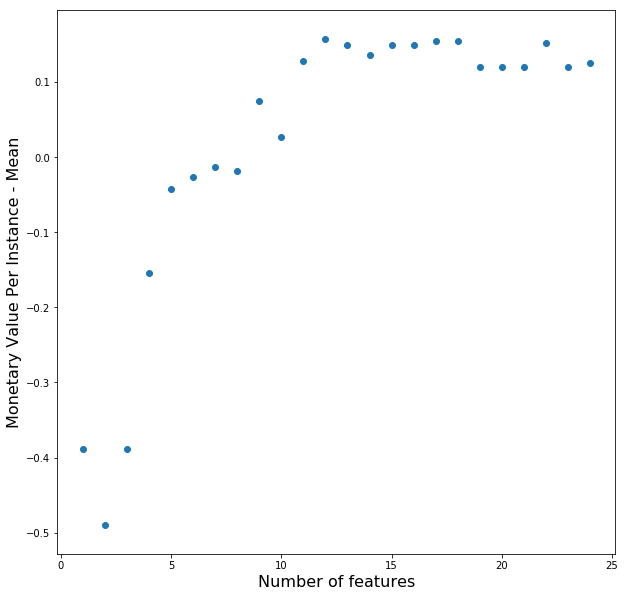

In [178]:
plt.rcParams['figure.figsize'] = (10,10)

plt.scatter(result_table["Feature Count"], result_table["Monetary Value Per Instance - Mean"])
plt.xlabel('Number of features', fontsize=16)
plt.ylabel('Monetary Value Per Instance - Mean', fontsize=16)

In [182]:
best_model = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]
best_model_features = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Features"]
best_parameters = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Optimal Parameters"]

model_pos = result_table.iloc[17,8]
print(model_pos)

#print(best_model)
#print(best_model_features)
#print(best_parameters)

Pipeline(memory=None,
     steps=[('voting', VotingClassifier(estimators=[('et', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samp...e=0.8))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[0, 1, 1]))])


In [ ]:
best_model = result_table.loc[result_table["Monetary Value Per Instance - Mean"].argmax()]["Raw Model"]

In [161]:
from sklearn.metrics import confusion_matrix

def get_monetary_value(cm):
        tn, fp, fn, tp = cm.ravel()
        print("True negative: ", tn)
        print("False positive: ", fp)
        print("False negative: ", fn)
        print("True positive: ", tp)
        score = (-25)*fp + (-5)*fn + 5*tp
        print(str(score) + " for " + str(sum(sum(cm))) + " instances in the test set")
        print(str(score/sum(sum(cm))) + " per instance in the test set")
        return score
    
cm = confusion_matrix(Y , best_model.predict(X[best_model_features]))

monetary_value = get_monetary_value(cm)

True negative:  1769
False positive:  6
False negative:  5
True positive:  99
320 for 1879 instances in the test set
0.17030335284725917 per instance in the test set
